## Convolutional Neural Networks (CNN)

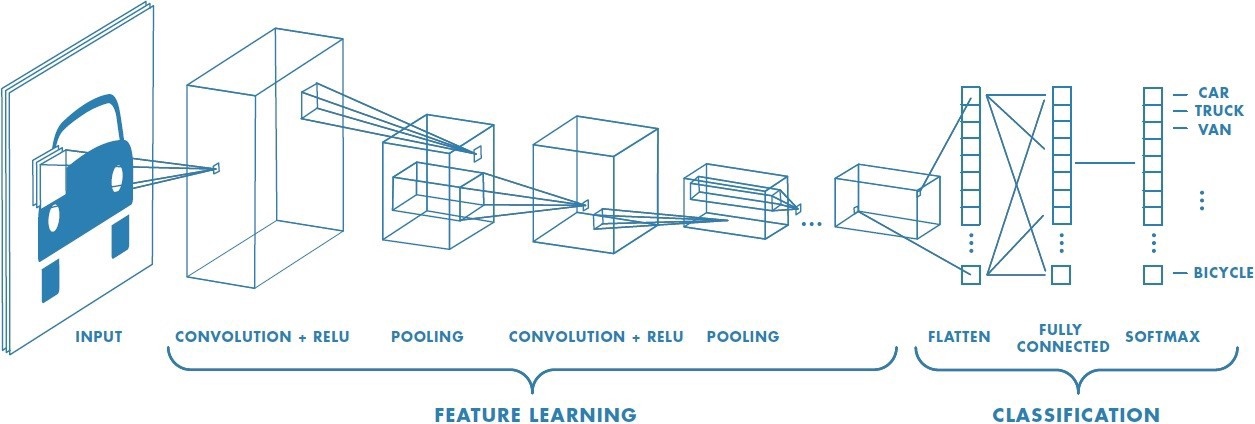

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import tensorflow
#from tensorflow.python.client import device_lib
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from tensorflow.keras.callbacks import TensorBoard


#print(device_lib.list_local_devices())

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

#gpu_devices = tensorflow.config.experimental.list_physical_devices('GPU')
#tensorflow.config.experimental.set_memory_growth(gpu_devices[0], True)
#print("GPUs: " + gpu_devices[0])

#gpus = tensorflow.test.gpu_device_name()
#print("GPUs: " + gpus)


In [2]:
# loading dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

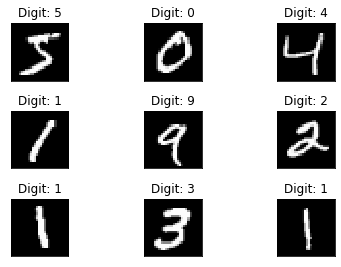

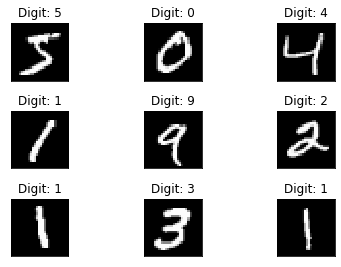

In [3]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [4]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)  

X_train shape (60000, 28, 28)
y_train shape (60000,)


In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [6]:
X_train /= 255
X_test /= 255

In [7]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
y_train.shape

(60000, 10)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 25)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4225)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               422600    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 423,860
Trainable params: 423,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 12s 25ms/step - loss: 0.2459 - accuracy: 0.9304 - val_loss: 

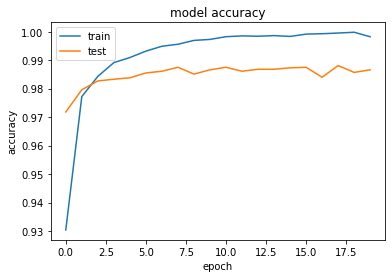

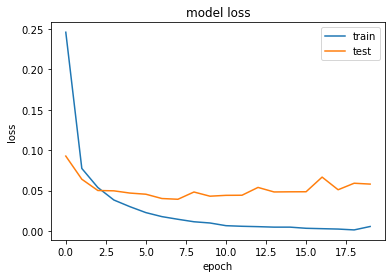

In [9]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model.summary()

my_callbacks = [
    TensorBoard(log_dir="C:/Users/alfre/Documents/GitHub/RNP/tensorboard/cnn_mnist",
                write_graph=True,
                update_freq="epoch")
]

# training the model for 10 epochs
results = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_data=(X_test, y_test),callbacks=my_callbacks)


# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

